In [18]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

In [19]:
def SignalModel_FP(theta, t):
    omega0, epsI, a0, chi = theta
    psidot = -epsI*omega0
    psi = psidot*t + np.pi/2.
    return (psidot**2*(2*(sin(chi)*cos(a0) - sin(a0)*sin(psi)*cos(chi))
                      *(sin(chi)*sin(a0)*sin(psi) + cos(chi)*cos(a0))*sin(chi)
                      - ((sin(chi)*sin(psi)*cos(a0) - sin(a0)*cos(chi))**2
                      + sin(chi)**2*cos(psi)**2)*cos(chi))*sin(chi)*sin(a0)
                      *cos(psi)/((sin(chi)*sin(psi)*cos(a0)
                    - sin(a0)*cos(chi))**2 
                      + sin(chi)**2*cos(psi)**2)**2
                        ) / (2*np.pi) 

def SignalModel_EM(theta, t):
    omega0, epsI, a0, chi, epsA = theta
    
    psi = -epsI*omega0*t + np.pi/2.

    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = 1 - epsI * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)

    # Standard values for c , R in cgs
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA * omega0**3 
    return -k * Phidot**3 * Sin2Theta / (2*np.pi)

## Low EM amplification

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 4.2426406871e+13
DeltaPhi_49 : 8.5311208489e-04
DeltaPhi_49_SpindownTorque : 3.5717464664e-09
DeltaPhi_63 : 1.3220606932e-06
DeltaPhi_75 : 4.7207804335e-07
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 4.8684999718e-03
P : 1.0005072145e-01
SwitchTime : 1.0000000000e+02
T : 1.0000000000e+04
a0 : 2.0000000000e+00
beta : -2.3326979465e-05
chi0 : 8.8600000000e+01
delta_omega_dot0_FP : 3.0280358132e-09
delta_omega_dot0_FP_EM : 4.6925218819e-12
epsA : 5.0000000000e-10
epsI1 : 0.0000000000e+00
epsI3 : 3.0000000000e-05
n : 5.0000000000e+04
nu_dot0 : -4.3772084811e-10
omega0 : 6.2800000000e+01
omega_dot0 : -2.7502812015e-09
tauA : 2.0010144290e+08
tauE : 2.2834028741e+10
tauP : 3.3350240484e+03
tauS : 2.2820398393e+10
upsilon : 0.0000000000e+00
wobble_angle : 3.4907138319e-02
wobble_angle_spindown : 1.4614662030e-07
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED


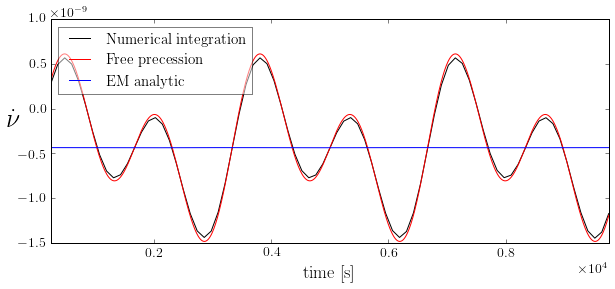

In [39]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 3e-5
omega0 = 2*np.pi*10
epsA = 5e-10
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3 * tauP
a0 = 2.0

n = 50000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=7, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# Simple analytic
theta_FP= np.array([omega0, epsI3, np.radians(a0), np.radians(chi0)])
ax1.plot(time, nu_dot0 + SignalModel_FP(theta_FP, time), "-", color='r', label="Free precession")

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM(theta_EM, time), color="b", label="EM analytic")

ax1.legend(frameon=True, loc='best', framealpha=0.5)

#ax1.set_title("EM amplification factor = {:2.4f}".format(PD['EMtorqueAmplificationfactor']))
plt.savefig("img/DoublePeaked_LowAem.pdf")
File_Functions.PropertiesTable(file_name, "DoublePeaked_LowAem.tex")
plt.show()

## High EM amplification

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 4.2426406871e+13
DeltaPhi_49 : 8.5390919716e-04
DeltaPhi_49_SpindownTorque : 2.1429846618e-07
DeltaPhi_63 : 4.7638654971e-03
DeltaPhi_75 : 1.7026582877e-03
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 1.7526599899e+01
P : 1.0005072145e-01
SwitchTime : 1.0000000000e+02
T : 4.0000000000e+05
a0 : 2.0000000000e+00
beta : -1.3980463325e-03
chi0 : 8.8600000000e+01
delta_omega_dot0_FP : 8.4112105921e-13
delta_omega_dot0_FP_EM : 4.6925218819e-12
epsA : 5.0000000000e-10
epsI1 : 0.0000000000e+00
epsI3 : 5.0000000000e-07
n : 1.0000000000e+05
nu_dot0 : -4.3772084811e-10
omega0 : 6.2800000000e+01
omega_dot0 : -2.7502812015e-09
tauA : 2.0010144290e+08
tauE : 2.2834028741e+10
tauP : 2.0010144290e+05
tauS : 2.2820398393e+10
upsilon : 0.0000000000e+00
wobble_angle : 3.4939754090e-02
wobble_angle_spindown : 8.7685385463e-06
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED


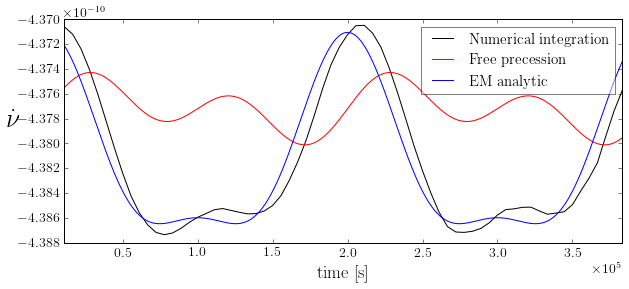

In [70]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 5e-7
omega0 = 2*np.pi*10
epsA = 5e-10
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 2 * tauP
a0 = 2.0

n = 100000
error = 1e-15

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)
ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=9, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# Simple analytic
theta_FP= np.array([omega0, epsI3, np.radians(a0), np.radians(chi0)])
ax1.plot(time, nu_dot0 + SignalModel_FP(theta_FP, time), "-", color='r', label="Free precession")

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM(theta_EM, time), color="b", label="EM analytic")

ax1.legend(frameon=True, loc='best', framealpha=0.5)
plt.savefig("img/DoublePeaked_HighAem.pdf")
File_Functions.PropertiesTable(file_name, "DoublePeaked_HighAem.tex")
#ax1.set_title("EM amplification factor = {:2.4f}".format(PD['EMtorqueAmplificationfactor']))
plt.show()

BETA FUNCTION IS USED


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6914052790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f690ebc2850>)

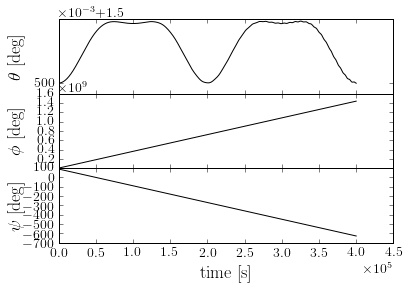

In [68]:
Plot.Euler_Angles(file_name)